In [45]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [46]:
df=pd.read_csv('software_defect.csv')

In [47]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [48]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [50]:
df.shape

(494020, 42)

In [51]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [52]:
print('Data set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
service
ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
Name: count, dtype: int64


In [53]:
from sklearn import preprocessing

In [54]:
lab=preprocessing.LabelEncoder()

In [55]:
df['protocol_type']=lab.fit_transform(df['protocol_type'])
df['service']=lab.fit_transform(df['service'])
df['flag']=lab.fit_transform(df['flag'])

In [56]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

### Rename all label: 0=normal, 1=DoS, 2=Probe, R2L and U2R.

DOS: denial-of-service, e.g. syn flood;
R2L: unauthorized access from a remote machine, e.g. guessing password;
U2R: unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow’’ attacks;
probing: surveillance and other probing, e.g., port scanning.

In [58]:
df1=df['label']

In [59]:
print('Label distribution Training set:')
print(df['label'].value_counts())

Label distribution Training set:
label
smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: count, dtype: int64


In [60]:
newdf=df1.replace({'normal':0,'smurf':1,'neptune':1,'back':1,'satan':2,'ipsweep':2,'portsweep':2,'warezclient': 2,'teardrop': 1,
                  'pod': 1,'nmap' : 2,'guess_passwd': 2,'buffer_overflow': 2,'land': 1,'warezmaster': 2,'imap': 2,'rootkit': 2,
                  'loadmodule': 2,'ftp_write': 2,'multihop': 2,'phf': 2,'perl': 2,'spy': 2})

In [61]:
print(newdf.head())
#newdf.to_csv('label.csv')

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


In [62]:
df['label'] = newdf
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int32  
 2   service                      494020 non-null  int32  
 3   flag                         494020 non-null  int32  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

<Axes: xlabel='label', ylabel='count'>

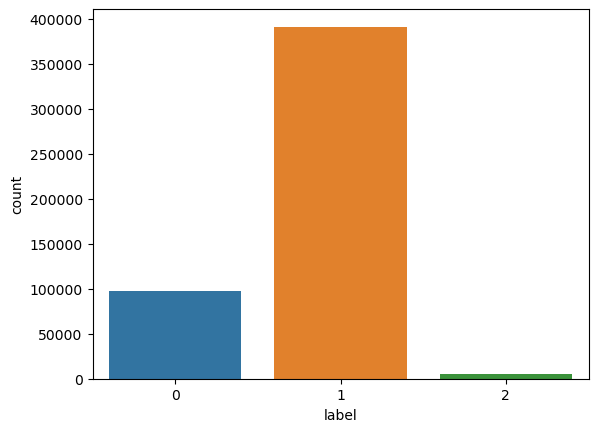

In [64]:
sns.countplot(x='label',data=df)

# Feature Selection

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [66]:
X = df.iloc[:,df.columns!='label'] 
y = df.iloc[:,df.columns=='label']   

In [67]:
model.fit(X,y)
print(model.feature_importances_)

[1.40510008e-03 7.60026974e-02 1.51954973e-02 2.21165294e-02
 1.07918511e-02 1.55769289e-03 4.22977973e-05 7.04105033e-03
 1.12954019e-05 9.28687012e-03 1.97936574e-04 1.64380462e-01
 5.73799589e-03 1.22998811e-04 5.65381532e-06 4.96560562e-05
 4.48270868e-05 1.90786024e-05 2.41673622e-05 0.00000000e+00
 0.00000000e+00 1.05953092e-03 1.69422922e-01 8.13452801e-02
 2.54206120e-02 2.97382855e-02 5.67278338e-03 1.21692063e-02
 5.87856403e-02 7.14635567e-03 1.01449211e-02 7.64510569e-02
 2.88474745e-02 3.29438894e-02 1.41761318e-02 6.11409899e-02
 7.77167567e-03 1.10872932e-02 3.36215057e-02 1.20931142e-02
 6.92767310e-03]


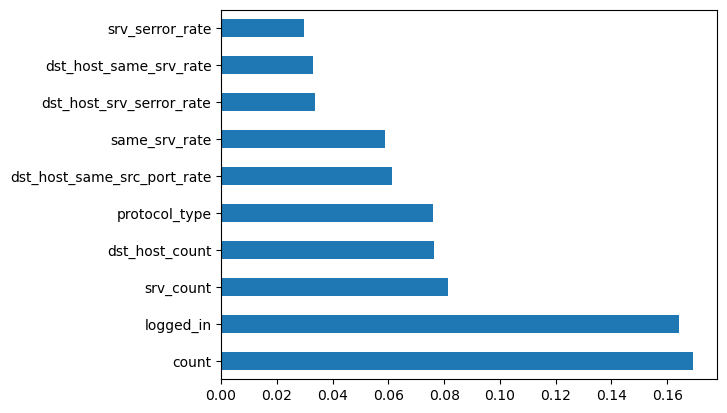

In [68]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [69]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [70]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [71]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
featureScores.nlargest(10,'Score')  

,Specs,Score
4,src_bytes,6.116996e+10
5,dst_bytes,2.308604e+09
0,duration,9.867518e+07
22,count,3.954004e+07
23,srv_count,3.519352e+07
31,dst_host_count,3.922659e+06
32,dst_host_srv_count,6.381743e+05
9,hot,3.765047e+05
11,logged_in,2.675627e+05
1,protocol_type,1.361731e+05


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.33)

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf=RandomForestClassifier()

In [76]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [77]:
predic=rf.predict(xtest)

In [78]:
acc1=accuracy_score(predic,ytest)
acc1

0.9997914455887675

In [79]:
clf=classification_report(predic,ytest)
print(clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32054
           1       1.00      1.00      1.00    129235
           2       0.99      0.99      0.99      1738

    accuracy                           1.00    163027
   macro avg       1.00      1.00      1.00    163027
weighted avg       1.00      1.00      1.00    163027



In [80]:
from sklearn import svm

In [81]:
sv=svm.LinearSVC()

In [ ]:
sv.fit(xtrain,ytrain)

In [ ]:
predic1=sv.predict(xtest)

In [ ]:
acc2=accuracy_score(predic1,ytest)
acc2

In [ ]:
clf1=classification_report(predic1,ytest)
print(clf1)

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Random Forest','Support Vector')
y_pos = np.arange(len(objects))
performance = [acc1,acc2]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('SVM vs Decision Tree')

plt.show()